In [2]:
import pandas as pd
import nltk
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
os.chdir('sample_data')

In [5]:
insultingTweets_df = pd.read_csv("insultingTweets.csv", header=0)
insultingTweets_df.tail()

,Insult,Date,Comment
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."
3946,0,20120515200734Z,"""You're all upset, defending this hipster band..."


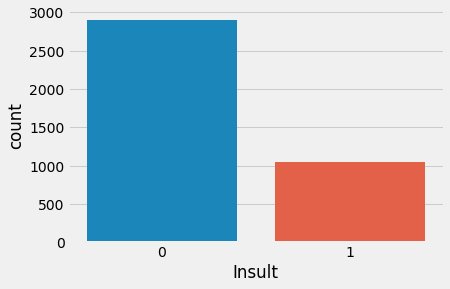

In [8]:
sns.countplot(x=train_df['Insult'])
plt.show()

# Creating Bag of words/Tokenization, Stop words and Word Cloud

In [4]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
en_stopwords = stopwords.words('english')
print(f"the number of nltk stopwords are: {len(en_stopwords)}\n")
print(f"sample stopwords are: {en_stopwords[50:60]}") 

the number of nltk stopwords are: 179

sample stopwords are: ['been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing']


In [12]:
insultingTweets_df_positive = insultingTweets_df.loc[insultingTweets_df['Insult']==0]['Comment']
insultingTweets_df_negative = insultingTweets_df.loc[insultingTweets_df['Insult']==1]['Comment']
print("Positive tweets:\n", insultingTweets_df_positive[:5])
print("\nNegative tweets:\n", insultingTweets_df_negative[:5])

Positive tweets:
 1    "i really don't understand your point.\xa0 It ...
2    "A\\xc2\\xa0majority of Canadians can and has ...
3    "listen if you dont wanna get married to a man...
4    "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
5    "@SDL OK, but I would hope they'd sign him to ...
Name: Comment, dtype: object

Negative tweets:
 0                                  "You fuck your dad."
7     "shut the fuck up. you and the rest of your fa...
8     "Either you are fake or extremely stupid...may...
9     "That you are an idiot who understands neither...
15    "FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ...
Name: Comment, dtype: object


In [34]:
print(f"There are {len(''.join([com for com in insultingTweets_df['Comment']]))} words in the comment field.")

There are 765194 words in the comment field.


In [13]:
positiveCommentList = [com for com in insultingTweets_df_positive]
negativeCommentList = [com for com in insultingTweets_df_negative]

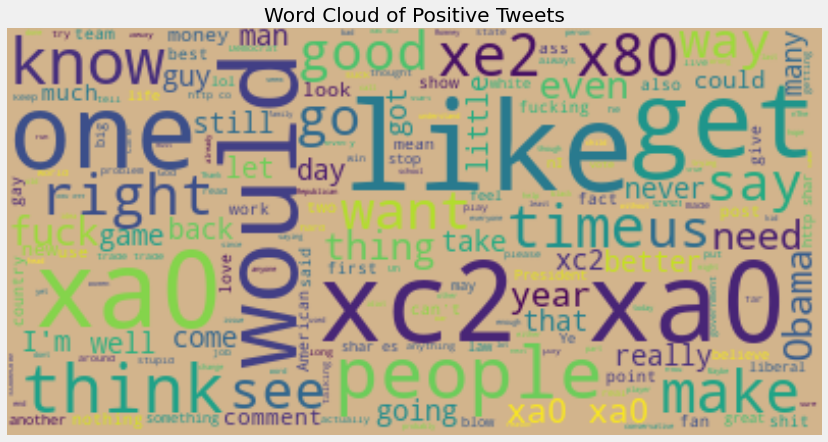

In [66]:
# Positive Word Cloud run 1 with exisiting stopwords
plt.figure(1,figsize=(13, 13))
plt.imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=200,
                     background_color='tan',
                    max_font_size=60).generate(''.join(positiveCommentList)), 
           interpolation='bilinear')  
plt.axis("off")
plt.title('Word Cloud of Positive Tweets')
plt.show()

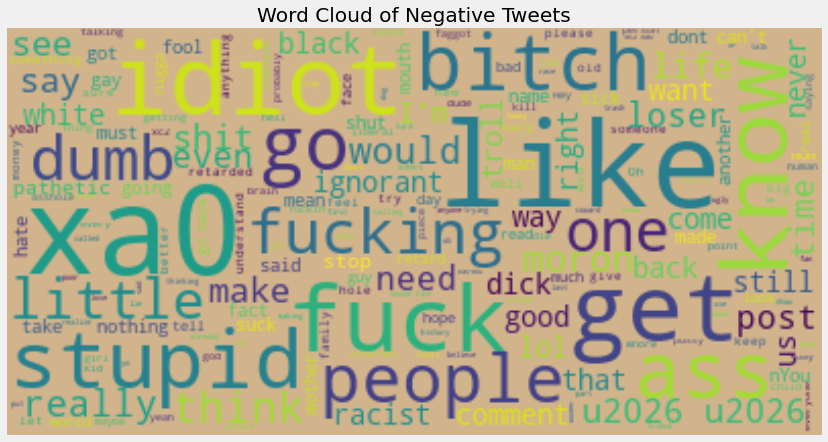

In [67]:
# Negative Word Cloud run 1 with exisiting stopwords
plt.figure(1,figsize=(13, 13))
plt.imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=200,
                     background_color='tan',
                    max_font_size=60).generate(''.join(negativeCommentList)), 
           interpolation='bilinear')  
plt.axis("off")
plt.title('Word Cloud of Negative Tweets')
plt.show()

# Data Cleaning using Regex

In [14]:
positiveCombinedComment = ''.join(positiveCommentList)
negativeCombinedComment = ''.join(negativeCommentList)

In [18]:
import re
import string

In [16]:
def cleaner(text):
    text=text.lower()
    text=re.sub('\w*\d\w*','', text ) #get rid of digits surrounded by words(w*)
    text=re.sub(r'[&\@\\!?%$\.#]','',  text) # list all unnecessary chars
    text=re.sub(r'""',' ',  text) #get rid of this ""
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    cleanedComment=re.sub(r'\\\\',' ',  text) # get rid of this \\\\
    return cleanedComment  

In [19]:
positiveCleanCombinedComment = cleaner(positiveCombinedComment)
positiveCleanCombinedComment[-1000:]

'ant person here is you who thinks that being registered as a republican means you treat everything ever done or said by every republican leader as gospel open your mind a little bit oh i had many cars like this before sara besleaga griji doruri sau dorin au  copiii mai mici  nnmul de urare   la fel sara  c avem nevoie  many toolbars include spell check like yahoo for example you might want to look into that just trying to help you make points easier to read lambeauorwrigleykmossnsioux falls sd i told my boy he should call around today and figure out what the options are i hope hes doing that how about felix he is sure turning into one hell of a starting pitcher i think if he gets his pitch count down and goes longer into games he can be a number three pitcher someday youre all upset defending this hipster bandand were the douches for reading the news and discussing itrnrnput down the pbr throw away the trucker hat shave off that silly shadowbeard put down your er sign and get a job io

In [20]:
negativeCleanCombinedComment = cleaner(negativeCombinedComment)
negativeCleanCombinedComment[-1000:]

'broke your arm and had no insurance no insurance company denies your claim or drops your coverage after finding out you have cancer or heart disease or ms get it nnwe are in the dark ages of medical care in the us and the neanderthal republicans want to keep it that way because their wealthy benefactors in the giant insurancepharma industrial complex like it that way these craven business people who lust after profits like an alcoholic lusts for a drink make huge boatloads of cash and mega profits off us and do not want that gravy train to stop true maybe hes deliberately being an asshle as a selfpromotional marketing gimmick because he knows controversial views will get him attention nnin that case lets screw his plan up by avoiding clicks on his articles and spreading the word to others to do the same thatll fix his red wagon  and its looking mighty red joelweltman you look like a pedophile from your picture go get yourself incarcerated you are both morons and that is never happenin

#### WordCloud after cleaning using Regex: Much cleaner after 1 round


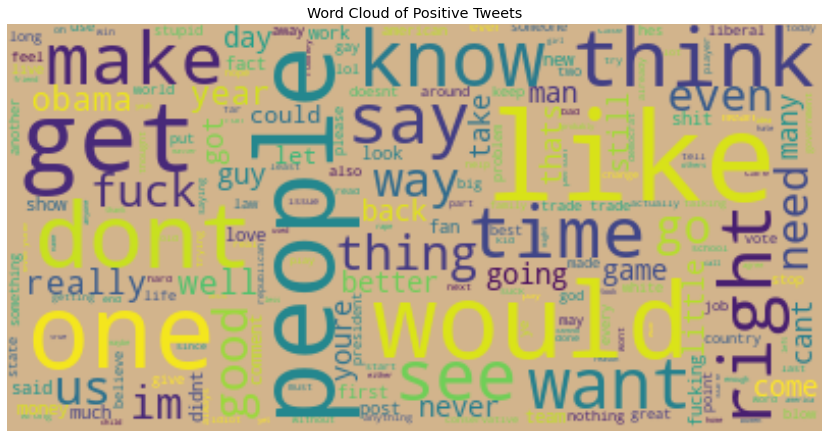

In [21]:
# Positive Word Cloud run 2 after cleaning using regex
plt.figure(1,figsize=(13, 13))
plt.imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=200,
                     background_color='tan',
                    max_font_size=60).generate(positiveCleanCombinedComment), 
           interpolation='bilinear')  
plt.axis("off")
plt.title('Word Cloud of Positive Tweets')
plt.show()

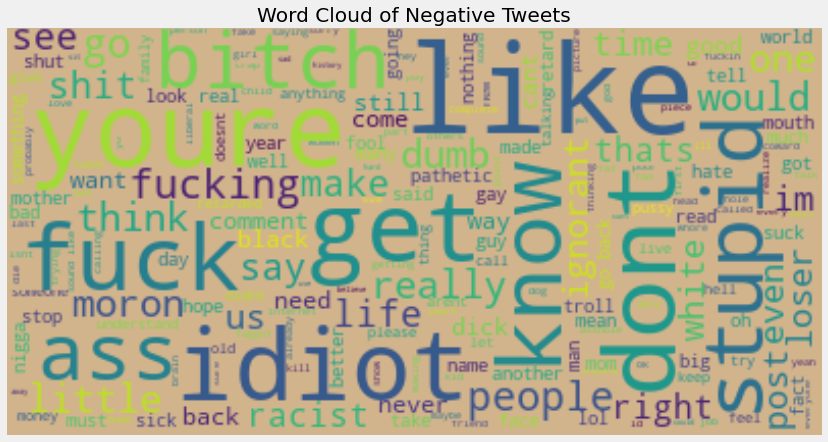

In [64]:
# negative Word Cloud run 2 after cleaning using regex
plt.figure(1,figsize=(13, 13))
plt.imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=200,
                     background_color='tan',
                    max_font_size=60).generate(negativeCleanCombinedComment), 
           interpolation='bilinear')  
plt.axis("off")
plt.title('Word Cloud of Negative Tweets')
plt.show()

In [ ]:
Subplots of wordcloud

### Subplots of wordcloud

In [28]:
# positive and negative comments are grouped
insultingTweets_df_positive = insultingTweets_df.loc[insultingTweets_df['Insult']==0]['Comment']
insultingTweets_df_negative = insultingTweets_df.loc[insultingTweets_df['Insult']==1]['Comment']

In [29]:
# Bag of words of the comments per polarity is created
combinedNegativeComment = ''.join([com for com in insultingTweets_df_negative])
combinedPositiveComment = ''.join([com for com in insultingTweets_df_positive])


In [30]:
# comments are lower cased, cleaned of unnecessary punctuations and digits and spaces
cleanedNegativeComment = cleaner(combinedNegativeComment)
cleanedPositiveComment = cleaner(combinedPositiveComment) 

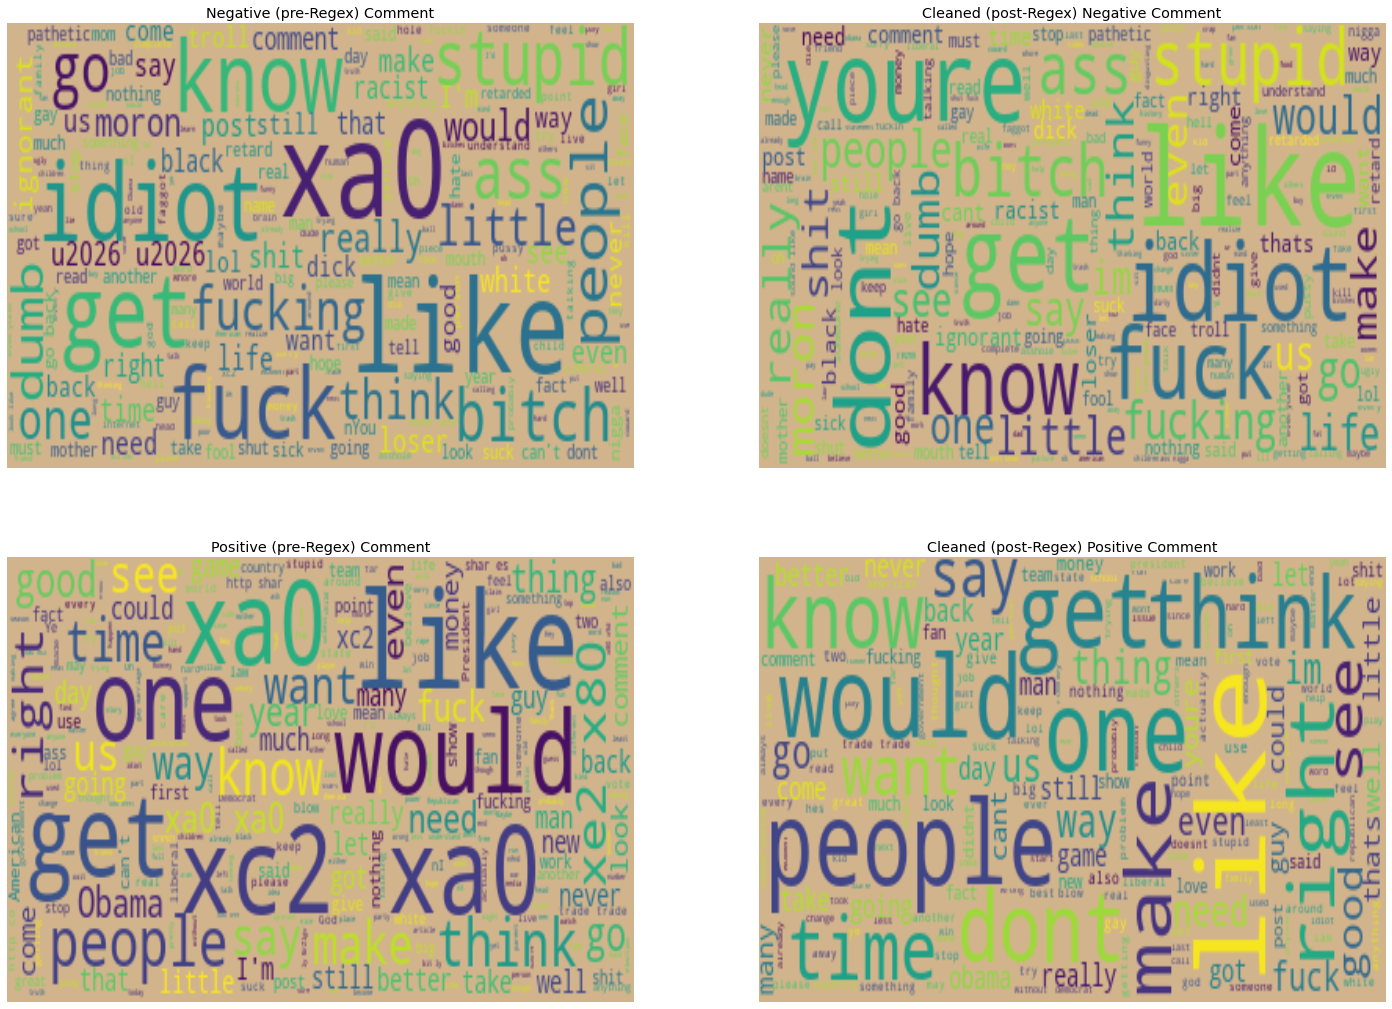

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(22, 18))
axs[0,0].imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=500,
                     background_color='tan',
                    max_font_size=60).generate(''.join(combinedNegativeComment)), 
           interpolation='bilinear',
               aspect="auto") 
axs[0,0].set_title("Negative (pre-Regex) Comment")
axs[0,0].axis("off")


axs[0,1].imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=500,
                     background_color='tan',
                    max_font_size=60).generate(''.join(cleanedNegativeComment)), 
           interpolation='bilinear',
               aspect="auto") 
axs[0,1].set_title("Cleaned (post-Regex) Negative Comment")
axs[0,1].axis("off")

#-----------
axs[1,0].imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=500,
                     background_color='tan',
                    max_font_size=60).generate(''.join(combinedPositiveComment)), 
           interpolation='bilinear',
               aspect="auto") 
axs[1,0].set_title("Positive (pre-Regex) Comment")
axs[1,0].axis("off")


axs[1,1].imshow(WordCloud(stopwords=stopwords.words("english"),
                     max_words=500,
                     background_color='tan',
                    max_font_size=60).generate(''.join(cleanedPositiveComment)), 
           interpolation='bilinear',
               aspect="auto") 
axs[1,1].set_title("Cleaned (post-Regex) Positive Comment")
axs[1,1].axis("off")
plt.show()